In [20]:
import pandas as pd
import numpy as np

## Columnas clave del dataset

El dataset cargado contiene las siguientes columnas clave, que se utilizarán para el análisis de predicción de fallos en los transformadores:

- **LOCATION**: Indica si el transformador está en un área urbana (1) o rural (0).
- **POWER**: La capacidad del transformador en kVA.
- **SELF-PROTECTION**: Indica si el transformador tiene protección interna (1) o no (0).
- **Average earth discharge density DDT** y **Maximum ground discharge density DDT**: Datos sobre la densidad de descarga de rayos por km² al año.
- **Burning rate**: Tasa de fallos del transformador (fallos por año).
- **Criticality**: Si el transformador está en un área crítica (1) o no (0), según estudios anteriores.
- **Removable connectors**: Si tiene conectores removibles (1) o no (0).
- **Type of clients**: Tipo de clientes conectados (estratos, oficial, comercial, etc.).
- **Number of users**: Cantidad de usuarios que dependen del transformador.
- **Electric power not supplied (EENS)**: Energía no suministrada en caso de fallo (kWh).
- **Type of installation**: Tipo de instalación (macro, anti-fraude, etc.).
- **Air network**: Si la red es aérea (1) o no (0).
- **Circuit Queue**: Si el transformador está al final de la red (1) o no (0).
- **km of network LT**: Longitud de la red de baja tensión (km).
- **Burned transformers**: Si el transformador se quemó o falló en 2019 (1) o no (0).


In [21]:
df2019=pd.read_excel('Dataset_Year_2019.xlsx')
display(df2019.shape)
df2019.columns=['LOCATION', 'POWER', 'SELF-PROTECTION',
       'Average earth discharge density DDT [Rays/km^2-año]',
       'Maximum ground discharge density DDT [Rays/km^2-año]',
       'Burning rate  [Failures/year]',
       'Criticality according to previous study for ceramics level',
       'Removable connectors', 'Type of clients', 'Number of users',
       'Electric power not supplied EENS [kWh] ', 'Type of installation',
       'Air network', 'Circuit Queue', 'km of network LT:',
       'Burned transformers']
df2019.info()

(15873, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15873 entries, 0 to 15872
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   LOCATION                                                    15873 non-null  int64  
 1   POWER                                                       15873 non-null  float64
 2   SELF-PROTECTION                                             15873 non-null  int64  
 3   Average earth discharge density DDT [Rays/km^2-año]         15873 non-null  float64
 4   Maximum ground discharge density DDT [Rays/km^2-año]        15873 non-null  float64
 5   Burning rate  [Failures/year]                               15873 non-null  float64
 6   Criticality according to previous study for ceramics level  15873 non-null  int64  
 7   Removable connectors                                        15873 non-null  int64  
 

In [22]:
df2020=pd.read_excel('Dataset_Year_2020.xlsx')
display(df2020.shape)
df2020.columns=['LOCATION', 'POWER', 'SELF-PROTECTION',
       'Average earth discharge density DDT [Rays/km^2-año]',
       'Maximum ground discharge density DDT [Rays/km^2-año]',
       'Burning rate  [Failures/year]',
       'Criticality according to previous study for ceramics level',
       'Removable connectors', 'Type of clients', 'Number of users',
       'Electric power not supplied EENS [kWh] ', 'Type of installation',
       'Air network', 'Circuit Queue', 'km of network LT:',
       'Burned transformers']
df2020.info()

(15873, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15873 entries, 0 to 15872
Data columns (total 16 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   LOCATION                                                    15873 non-null  int64  
 1   POWER                                                       15873 non-null  float64
 2   SELF-PROTECTION                                             15873 non-null  int64  
 3   Average earth discharge density DDT [Rays/km^2-año]         15873 non-null  float64
 4   Maximum ground discharge density DDT [Rays/km^2-año]        15873 non-null  float64
 5   Burning rate  [Failures/year]                               15873 non-null  float64
 6   Criticality according to previous study for ceramics level  15873 non-null  int64  
 7   Removable connectors                                        15873 non-null  int64  
 

In [23]:

# Añadir una columna de año para distinguir los registros
df2019['Year'] = 2019
df2020['Year'] = 2020

# Concatenar los datasets
df = pd.concat([df2019, df2020], ignore_index=True)

# Crear un identificador único basado en varias columnas
df['transformer_id'] = df[['LOCATION', 'POWER', 'SELF-PROTECTION', 
                                             'Criticality according to previous study for ceramics level', 'Removable connectors', 
                                             'Type of installation', 'Circuit Queue', 
                                             'km of network LT:']].astype(str).agg('-'.join, axis=1)

# Eliminar duplicados para obtener los transformadores únicos
unique_transformers = df.drop_duplicates(subset=['transformer_id'])

# Contar los transformadores únicos
num_unique_transformers = unique_transformers.shape[0]

print(f"Número de transformadores únicos: {num_unique_transformers}")


Número de transformadores únicos: 16050


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31746 entries, 0 to 31745
Data columns (total 18 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   LOCATION                                                    31746 non-null  int64  
 1   POWER                                                       31746 non-null  float64
 2   SELF-PROTECTION                                             31746 non-null  int64  
 3   Average earth discharge density DDT [Rays/km^2-año]         31746 non-null  float64
 4   Maximum ground discharge density DDT [Rays/km^2-año]        31746 non-null  float64
 5   Burning rate  [Failures/year]                               31746 non-null  float64
 6   Criticality according to previous study for ceramics level  31746 non-null  int64  
 7   Removable connectors                                        31746 non-null  int64  
 

In [25]:
df.sample()


,LOCATION,POWER,SELF-PROTECTION,Average earth discharge density DDT [Rays/km^2-año],Maximum ground discharge density DDT [Rays/km^2-año],Burning rate [Failures/year],Criticality according to previous study for ceramics level,Removable connectors,Type of clients,Number of users,Electric power not supplied EENS [kWh],Type of installation,Air network,Circuit Queue,km of network LT:,Burned transformers,Year,transformer_id
14172,0,15.0,0,4.868885,11.7,0.0,0,0,STRATUM 1,9,340.2,POLE,1,0,0.62872,0,2019,0-15.0-0-0-0-POLE-0-0.62872


In [26]:
# Analisis de trafos quemados en 2019
quemados2019 = df[df['Year'] == 2019]['Burned transformers'].sum()

# Contar transformadores únicos en 2019
unique_2019 = df[df['Year'] == 2019]['transformer_id'].nunique()

print(f'Los trafos quemados en 2019 son {quemados2019} unidades: {(quemados2019/unique_2019)*100:.2f}%')

# Analisis de trafos quemados en 2020
quemados2020 = df[df['Year'] == 2020]['Burned transformers'].sum()

# Contar transformadores únicos en 2020
unique_2020 = df[df['Year'] == 2020]['transformer_id'].nunique()

print(f'Los trafos quemados en 2020 son {quemados2020} unidades: {(quemados2020/unique_2020)*100:.2f}%')


Los trafos quemados en 2019 son 807 unidades: 5.37%
Los trafos quemados en 2020 son 629 unidades: 4.19%


In [27]:
mean_power_burned = df[df['Burned transformers'] == 1]['POWER'].mean()
mean_power_not_burned = df[df['Burned transformers'] == 0]['POWER'].mean()

print(f'Potencia promedio de transformadores quemados: {mean_power_burned:.2f} kVA')
print(f'Potencia promedio de transformadores no quemados: {mean_power_not_burned:.2f} kVA')
print('La media aritmetica de los quemados es mucho mas baja que los quemados')

Potencia promedio de transformadores quemados: 15.97 kVA
Potencia promedio de transformadores no quemados: 27.81 kVA
La media aritmetica de los quemados es mucho mas baja que los quemados


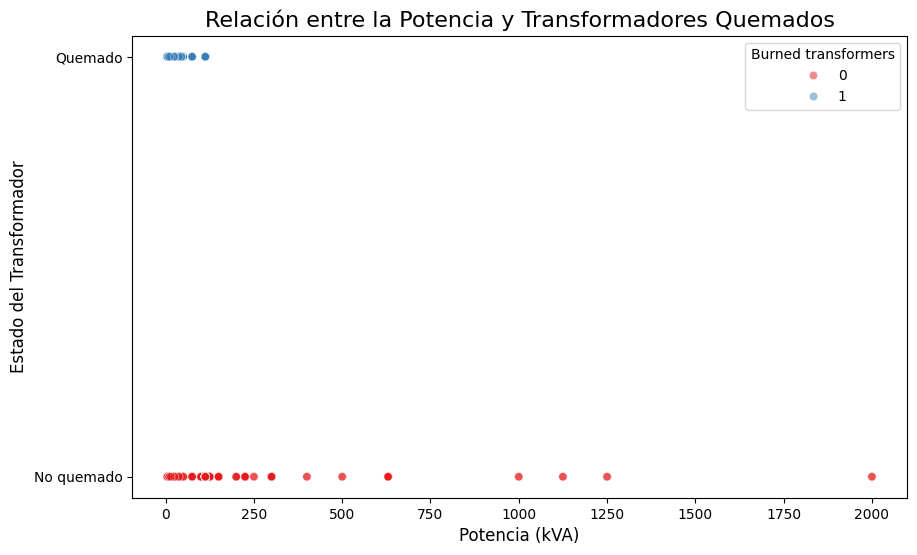

In [28]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un gráfico de dispersión con jitter
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión con diferentes colores para quemados y no quemados
sns.scatterplot(data=df, x='POWER', y='Burned transformers', alpha=0.5, hue='Burned transformers', palette='Set1')

# Modificar las etiquetas del eje Y
plt.yticks([0, 1], ['No quemado', 'Quemado'])

# Añadir títulos y etiquetas
plt.title('Relación entre la Potencia y Transformadores Quemados', fontsize=16)
plt.xlabel('Potencia (kVA)', fontsize=12)
plt.ylabel('Estado del Transformador', fontsize=12)

# Mostrar el gráfico
plt.show()

In [29]:

correlation = df[['POWER', 'Burned transformers']].corr()
print(correlation)
print('La correlacion es negativa entre potencia y trafos quemados, no implican relación')

                        POWER  Burned transformers
POWER                1.000000            -0.068969
Burned transformers -0.068969             1.000000
La correlacion es negativa entre potencia y trafos quemados, no implican relación


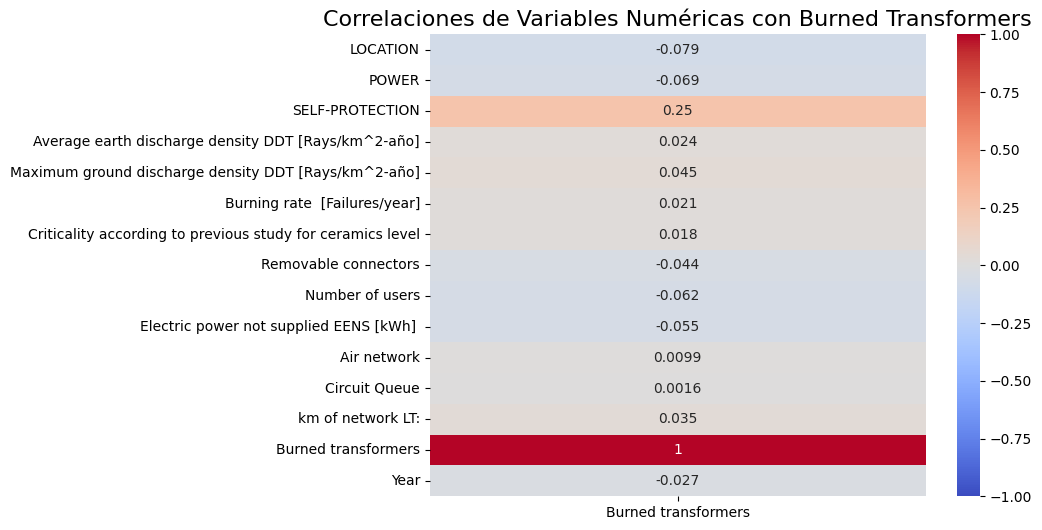

In [30]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcular la correlación de todas las variables numéricas con 'Burned transformers'
correlation_matrix = df_numeric.corr()

# Filtrar solo las correlaciones con 'Burned transformers'
corr_with_burned = correlation_matrix[['Burned transformers']]

# Crear un heatmap para visualizar las correlaciones con 'Burned transformers'
plt.figure(figsize=(8, 6))
sns.heatmap(corr_with_burned, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Añadir título y etiquetas
plt.title('Correlaciones de Variables Numéricas con Burned Transformers', fontsize=16)
plt.show()


Burned transformers           0         1
Type of clients                          
COMMERCIAL            98.372781  1.627219
INDUSTRIAL            98.739496  1.260504
OFFICIAL              97.727273  2.272727
STRATUM 1             94.842932  5.157068
STRATUM 2             98.571429  1.428571
STRATUM 3             99.648712  0.351288
STRATUM 4             99.388379  0.611621
STRATUM 5            100.000000  0.000000
STRATUM 6             97.222222  2.777778


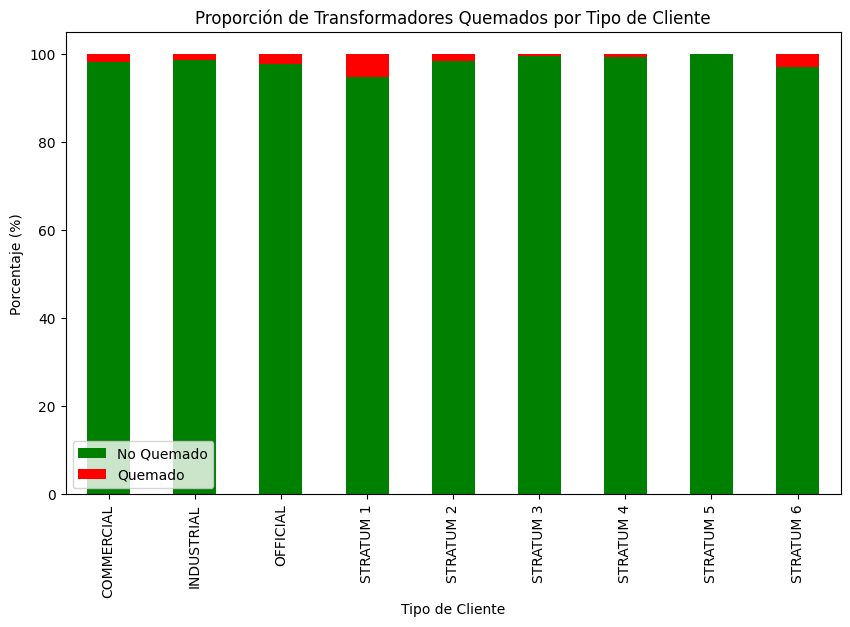

In [31]:
# Crear una tabla de frecuencia para 'Type of clients' y 'Burned transformers'
type_clients_burned = pd.crosstab(df['Type of clients'], df['Burned transformers'], normalize='index') * 100

# Mostrar la tabla
print(type_clients_burned)

# Graficar el resultado
type_clients_burned.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.title('Proporción de Transformadores Quemados por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Porcentaje (%)')
plt.legend(['No Quemado', 'Quemado'])
plt.show()


In [32]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia para 'Type of clients' y 'Burned transformers'
contingency_table = pd.crosstab(df['Type of clients'], df['Burned transformers'])

# Realizar el test de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrar el resultado
print(f"Chi2: {chi2}")
print(f"p-value: {p}")

# Interpretación del p-value
if p < 0.05:
    print("Existe una relación significativa entre el tipo de cliente y los transformadores quemados.")
else:
    print("No existe una relación significativa entre el tipo de cliente y los transformadores quemados.")


Chi2: 161.26717230097208
p-value: 8.688222132164883e-31
Existe una relación significativa entre el tipo de cliente y los transformadores quemados.


Burned transformers          0          1
SELF-PROTECTION                          
0                    97.224361   2.775639
1                    79.754408  20.245592


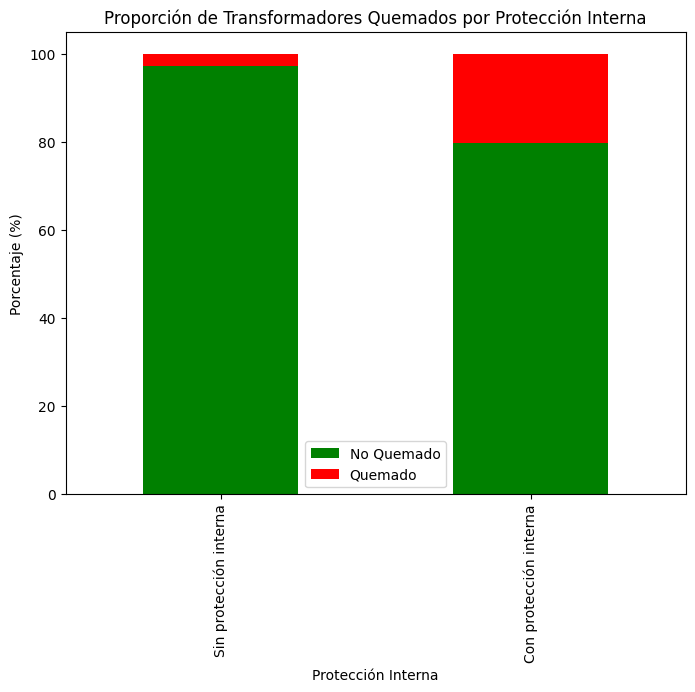

In [33]:
# Crear una tabla de frecuencia para 'SELF-PROTECTION' y 'Burned transformers'
self_protection_burned = pd.crosstab(df['SELF-PROTECTION'], df['Burned transformers'], normalize='index') * 100

# Mostrar la tabla
print(self_protection_burned)

# Graficar el resultado
self_protection_burned.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))

# Cambiar las etiquetas del eje X
plt.xticks([0, 1], ['Sin protección interna', 'Con protección interna'])

# Añadir título y etiquetas
plt.title('Proporción de Transformadores Quemados por Protección Interna')
plt.xlabel('Protección Interna')
plt.ylabel('Porcentaje (%)')
plt.legend(['No Quemado', 'Quemado'])
plt.show()


Burned transformers                    0          1
Type of installation                               
CABINA                        100.000000   0.000000
EN H                           85.097493  14.902507
MACRO WITHOUT ANTI-FRAUD NET   98.743102   1.256898
OTROS                          81.250000  18.750000
PAD MOUNTED                   100.000000   0.000000
POLE                           95.444915   4.555085
POLE WITH ANTI-FRAU NET        95.702006   4.297994
POLE WITH ANTI-FRAUD NET       94.364852   5.635148
TORRE METALICA                 66.666667  33.333333


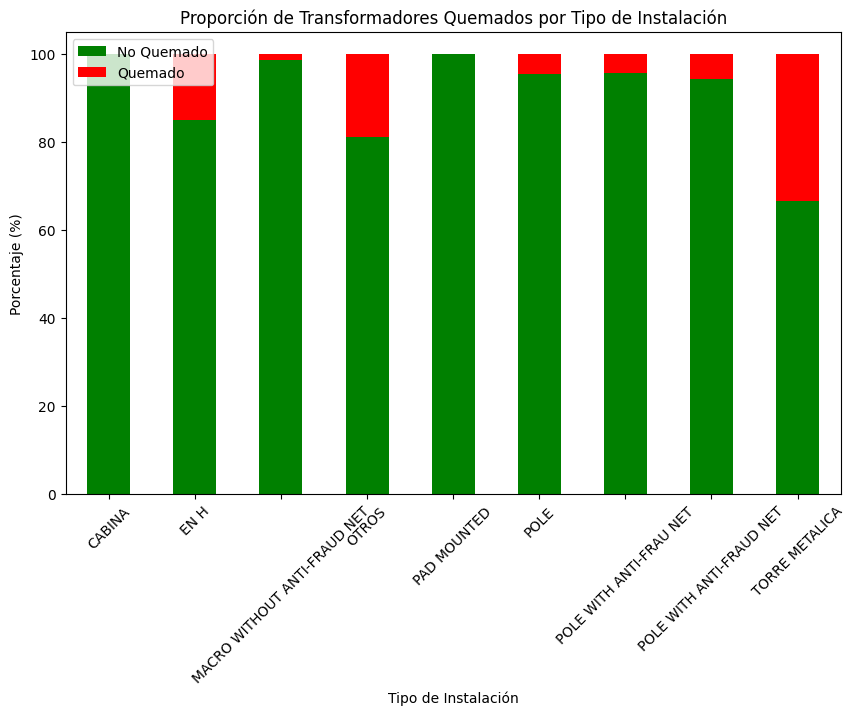

In [34]:
# Crear una tabla de frecuencia para 'Type of installation' y 'Burned transformers'
type_installation_burned = pd.crosstab(df['Type of installation'], df['Burned transformers'], normalize='index') * 100

# Mostrar la tabla
print(type_installation_burned)

# Graficar el resultado
type_installation_burned.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10, 6))
plt.title('Proporción de Transformadores Quemados por Tipo de Instalación')
plt.xlabel('Tipo de Instalación')
plt.ylabel('Porcentaje (%)')
plt.legend(['No Quemado', 'Quemado'])
plt.xticks(rotation=45)
plt.show()



Burned transformers                                         0         1
Criticality according to previous study for cer...                     
0                                                   95.674978  4.325022
1                                                   94.770115  5.229885


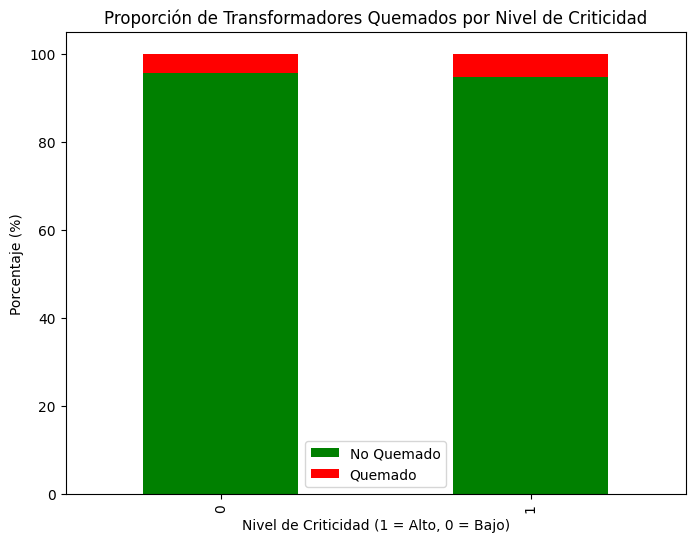

In [35]:
# Crear una tabla de frecuencia para 'Criticality' y 'Burned transformers'
criticality_burned = pd.crosstab(df['Criticality according to previous study for ceramics level'], df['Burned transformers'], normalize='index') * 100

# Mostrar la tabla
print(criticality_burned)

# Graficar el resultado
criticality_burned.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(8, 6))
plt.title('Proporción de Transformadores Quemados por Nivel de Criticidad')
plt.xlabel('Nivel de Criticidad (1 = Alto, 0 = Bajo)')
plt.ylabel('Porcentaje (%)')
plt.legend(['No Quemado', 'Quemado'])
plt.show()


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Seleccionar las variables categóricas y numéricas
columns_of_interest = ['SELF-PROTECTION', 'Type of clients', 'Type of installation', 
                       'Criticality according to previous study for ceramics level',
                       'Number of users','POWER','Burning rate  [Failures/year]','Year']

# Aplicar One-Hot Encoding a las variables categóricas
X = pd.get_dummies(df[columns_of_interest], drop_first=True)
y = df['Burned transformers']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Entrenar un modelo de Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy del modelo Random Forest:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Accuracy del modelo Random Forest: 0.8915371692566149
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      9069
           1       0.19      0.37      0.25       455

    accuracy                           0.89      9524
   macro avg       0.58      0.65      0.59      9524
weighted avg       0.93      0.89      0.91      9524



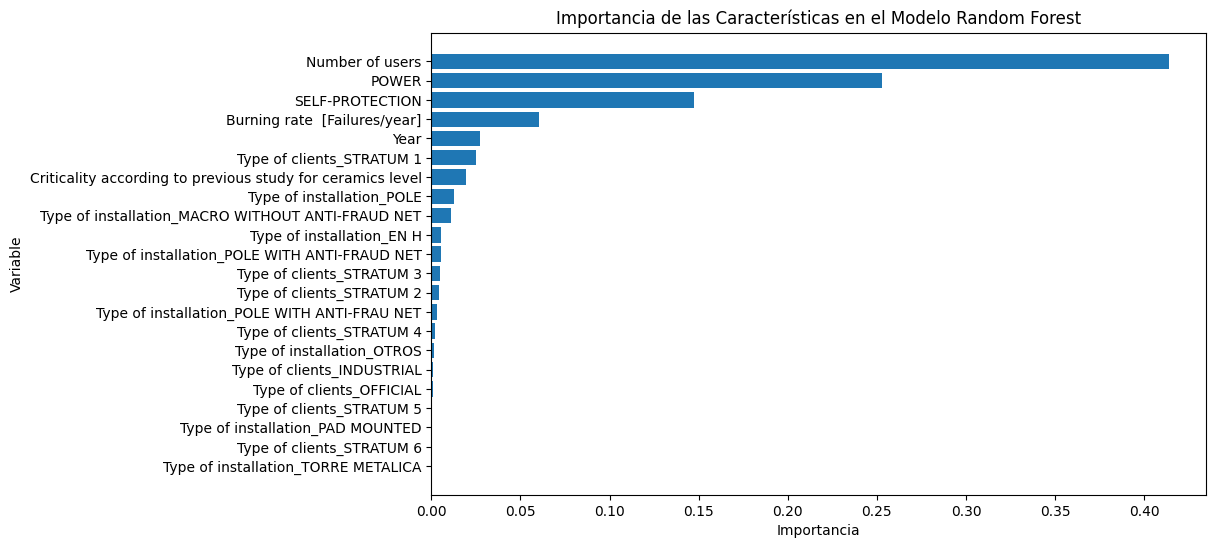

                                             Variable  Importancia
2                                     Number of users     0.414226
3                                               POWER     0.252643
0                                     SELF-PROTECTION     0.147359
4                       Burning rate  [Failures/year]     0.060512
5                                                Year     0.027327
8                           Type of clients_STRATUM 1     0.025040
1   Criticality according to previous study for ce...     0.019453
18                          Type of installation_POLE     0.012881
15  Type of installation_MACRO WITHOUT ANTI-FRAUD NET     0.011180
14                          Type of installation_EN H     0.005391
20      Type of installation_POLE WITH ANTI-FRAUD NET     0.005387
10                          Type of clients_STRATUM 3     0.004675
9                           Type of clients_STRATUM 2     0.004197
19       Type of installation_POLE WITH ANTI-FRAU NET     0.00

In [37]:


# Obtener las importancias de las características
importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar las importancias
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
})

# Ordenar las características por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Visualizar las importancias con un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Variable'], feature_importance_df['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características en el Modelo Random Forest')
plt.gca().invert_yaxis()  # Para que la variable más importante aparezca arriba
plt.show()

# Mostrar las importancias
print(feature_importance_df)


In [38]:
import numpy as np

# Crear un nuevo ejemplo de transformador
nuevo_transformador = pd.DataFrame({
    'SELF-PROTECTION': [1],                    # Con protección interna
    'Type of clients': ['STRATUM 2'],           # Estrato 2
    'Type of installation': ['ANTIFRAUD'],      # Instalación antifraude
    'Criticality according to previous study for ceramics level': [1],  # Crítico
    'Number of users': [150],                   # Número de usuarios
    'POWER': [100],                             # Potencia en kVA
    'Burning rate  [Failures/year]': [0.05],    # Tasa de fallos
    'Year': [2020]                              # Año
})

# Aplicar One-Hot Encoding al nuevo transformador, usando el mismo formato que el conjunto de entrenamiento
nuevo_transformador_encoded = pd.get_dummies(nuevo_transformador, drop_first=True)

# Asegurarse de que el nuevo transformador tenga las mismas columnas que el conjunto de entrenamiento
nuevo_transformador_encoded = nuevo_transformador_encoded.reindex(columns=X.columns, fill_value=0)

# Escalar los datos numéricos del nuevo transformador
nuevo_transformador_scaled = scaler.transform(nuevo_transformador_encoded)

# Predecir usando el modelo entrenado
prediccion = rf_model.predict(nuevo_transformador_scaled)

# Mostrar el resultado
if prediccion[0] == 1:
    print("El modelo predice que el transformador se quemará.")
else:
    print("El modelo predice que el transformador NO se quemará.")


El modelo predice que el transformador NO se quemará.


In [39]:
# Crear un nuevo ejemplo de transformador con características de alto riesgo
nuevo_transformador_riesgo = pd.DataFrame({
    'SELF-PROTECTION': [0],                    # Sin protección interna
    'Type of clients': ['STRATUM 1'],           # Estrato 1
    'Type of installation': ['STANDARD'],       # Instalación estándar
    'Criticality according to previous study for ceramics level': [1],  # Crítico
    'Number of users': [500],                   # Número de usuarios
    'POWER': [50],                              # Potencia en kVA
    'Burning rate  [Failures/year]': [0.3],     # Tasa de fallos alta
    'Year': [2019]                              # Año 2019
})

# Aplicar One-Hot Encoding al nuevo transformador
nuevo_transformador_encoded_riesgo = pd.get_dummies(nuevo_transformador_riesgo, drop_first=True)

# Asegurarse de que el nuevo transformador tenga las mismas columnas que el conjunto de entrenamiento
nuevo_transformador_encoded_riesgo = nuevo_transformador_encoded_riesgo.reindex(columns=X.columns, fill_value=0)

# Escalar los datos numéricos del nuevo transformador
nuevo_transformador_scaled_riesgo = scaler.transform(nuevo_transformador_encoded_riesgo)

# Predecir usando el modelo entrenado
prediccion_riesgo = rf_model.predict(nuevo_transformador_scaled_riesgo)

# Mostrar el resultado
if prediccion_riesgo[0] == 1:
    print("El modelo predice que el transformador se quemará.")
else:
    print("El modelo predice que el transformador NO se quemará.")


El modelo predice que el transformador NO se quemará.
